# Data Analysis on Tesco Dataset

## 1. Import Library and data needed for the analysis

In [1]:
import os
import pandas as pd
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import pearsonr

In [2]:
# Initialization
month = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [3]:
cat = pd.read_csv('food_categories.csv')
food_cat = list(np.unique(cat['category'].values))

In [4]:
os.chdir('7796666')
files_name = os.listdir('.')

In [5]:
lsoa = {}
msoa = {}
osward = {}
borough = {}

for i in files_name:
    if 'borough' in i:
        temp = re.match(r'(\w+)_borough', i)
        borough[temp.group(1)] = pd.read_csv(i)
    elif 'lsoa' in i:
        temp = re.match(r'(\w+)_lsoa', i)
        lsoa[temp.group(1)] = pd.read_csv(i)
    elif 'msoa' in i:
        temp = re.match(r'(\w+)_msoa', i)
        msoa[temp.group(1)] = pd.read_csv(i)
    else:
        temp = re.match(r'(\w+)_osward', i)
        osward[temp.group(1)] = pd.read_csv(i)

In [6]:
os.chdir('..')
os.chdir('Income')

In [7]:
income = pd.read_csv('income_bo.csv')

In [8]:
# Create a new column showing name of each borough
borough['year']['area_name'] = income['Area']
area = list(borough['year']['area_id'].values) # check later whether it is needed or not

In [9]:
col_name = list(borough['Jan'].columns)

# To get names of all food categories
f_cat = []
for i in col_name:
    if i.startswith('f_') and 'energy' not in i and 'weight' not in i:
        f_cat.append(i)

f_energy = []
for i in col_name:
    if i.startswith('f_') and 'weight' in i:
        f_energy.append(i)
        
energy_nut = []
for i in col_name:
    if i.startswith('energy_') and 'per' not in i and 'std' not in i and 'ci' not in i and 'den' not in i and 'tot' not in i:
        energy_nut.append(i)
        
f_energy_nut = []
for i in col_name:
    if i.startswith('f_energy_') and 'saturate' not in i and 'sugar' not in i:
        f_energy_nut.append(i)

f_energy_cat = []
for i in col_name:
    if i.startswith('f_') and 'weight' not in i and i[2:] in food_cat:
        f_energy_cat.append(i)

## 2. Explore the dataset

In [10]:
# Find the correlation between all columns
borough['year'].iloc[:,1:-1].corr()

,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
weight,1.000000,0.781436,0.908207,0.945726,0.911446,0.779774,0.847868,-0.582303,0.859757,-0.787305,...,0.740552,0.439757,0.476603,0.399927,0.496727,0.470373,-0.020938,-0.595119,-0.177077,0.316655
weight_perc2.5,0.781436,1.000000,0.914896,0.900558,0.837985,0.419105,0.411350,-0.754760,0.504167,-0.740709,...,0.805621,0.205649,0.246640,0.163424,0.134178,0.310994,-0.241404,-0.416491,-0.406082,0.535347
weight_perc25,0.908207,0.914896,1.000000,0.952770,0.912750,0.585748,0.574282,-0.721272,0.676194,-0.775805,...,0.788884,0.324674,0.357057,0.290122,0.337630,0.381530,-0.115678,-0.482713,-0.263915,0.368588
weight_perc50,0.945726,0.900558,0.952770,1.000000,0.921093,0.651087,0.667402,-0.728774,0.757275,-0.840324,...,0.808889,0.377185,0.413121,0.338717,0.381628,0.428593,-0.052996,-0.528798,-0.189253,0.401570
weight_perc75,0.911446,0.837985,0.912750,0.921093,1.000000,0.528148,0.641213,-0.690755,0.680210,-0.808230,...,0.726234,0.414723,0.451867,0.374780,0.412396,0.479017,-0.079981,-0.644594,-0.256149,0.467956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
age_18_64,0.470373,0.310994,0.381530,0.428593,0.479017,0.209884,0.369665,-0.662204,0.385249,-0.471597,...,0.616923,0.973864,0.979733,0.960873,0.871805,1.000000,0.516401,-0.618359,0.291405,0.243114
age_65+,-0.020938,-0.241404,-0.115678,-0.052996,-0.079981,0.052801,0.043452,-0.158373,0.142343,-0.037210,...,0.095779,0.675127,0.632623,0.712378,0.680149,0.516401,1.000000,0.204963,0.867730,-0.504042
avg_age,-0.595119,-0.416491,-0.482713,-0.528798,-0.644594,-0.351597,-0.512514,0.499510,-0.442459,0.440134,...,-0.495480,-0.504326,-0.542450,-0.462752,-0.472721,-0.618359,0.204963,1.000000,0.307082,-0.611618
area_sq_km,-0.177077,-0.406082,-0.263915,-0.189253,-0.256149,-0.005173,-0.059310,0.048213,0.076786,0.151240,...,-0.105018,0.465787,0.422172,0.505680,0.531553,0.291405,0.867730,0.307082,1.000000,-0.685731


### Insight 1: Correlation between food categories

In [11]:
# I have to remove 'saturate' and 'sugar' because it these two are already included in 'fat' and 'carb', otherwise it will be repititive        

# Print checking whether they are summed to one or not
print(borough['year'][f_energy_nut].sum(axis=1).values, "\n")
print(borough['year'][f_energy_cat].sum(axis=1).values, "\n")

# Create three new columns, ratio of teenager, middle age, and elderly
borough['year']['ratio_kid'] = borough['year']['age_0_17'] / borough['year']['population']
borough['year']['ratio_middle'] = borough['year']['age_18_64'] / borough['year']['population']
borough['year']['ratio_elder'] = borough['year']['age_65+'] / borough['year']['population']

print(borough['year'][['age_0_17','age_18_64','age_65+','ratio_kid','ratio_middle','ratio_elder']].head(), "\n")

# Create two new columns, ratio_men and ratio_women
borough['year']['ratio_men'] = borough['year']['male'] / borough['year']['population']
borough['year']['ratio_women'] = borough['year']['female'] / borough['year']['population']

print(borough['year'][['population', 'ratio_men', 'ratio_women']].head(), "\n")

# Find the correlation of these ratios with other features

# Try with each nutrition first
ratio_with_nutrition = f_energy_nut.copy()
ratio_with_nutrition += ['ratio_kid','ratio_middle','ratio_elder']

# each food category with age
ratio_with_cat = f_energy_cat.copy()
ratio_with_cat += ['ratio_kid','ratio_middle','ratio_elder']

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

   age_0_17  age_18_64  age_65+  ratio_kid  ratio_middle  ratio_elder
0    1018.0     4349.0   1320.0   0.152236      0.650366     0.197398
1   60281.0   123180.0  19640.0   0.296803      0.606496     0.096701
2   88754.0   237036.0  52988.0   0.234317      0.625791     0.139892
3   56028.0   146237.0  40122.0   0.231151      0.603320     0.165529
4   75033.0   211885.0  36525.0   0.231982      0.655092     0.112926 

   population  ratio_men  ratio_women
0      6687.0   0.552864     0.447136
1    203101.0   0.489618     0.510382
2    378778.0   0.491995     0.508005
3    242387.0   0.481932     0.518068
4    323443.0   0.506856     0.493144 



<Axes: >

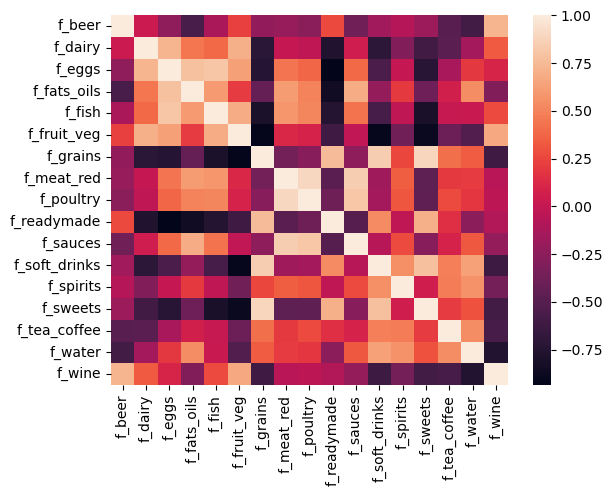

In [13]:
corr_cat = borough['year'][f_energy_cat].corr()
sns.heatmap(corr_cat)

<Axes: >

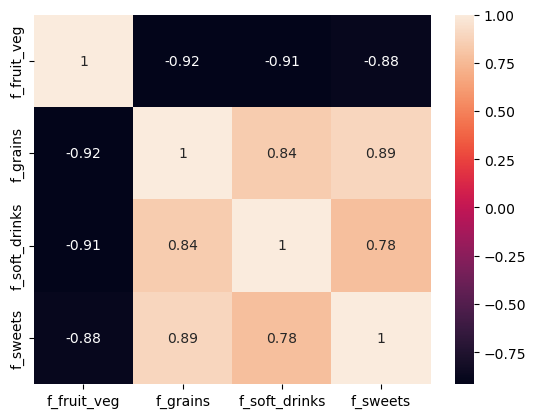

In [14]:
high_corr = borough['year'][['f_fruit_veg', 'f_grains','f_soft_drinks', 'f_sweets']].corr()
sns.heatmap(high_corr, annot=True)

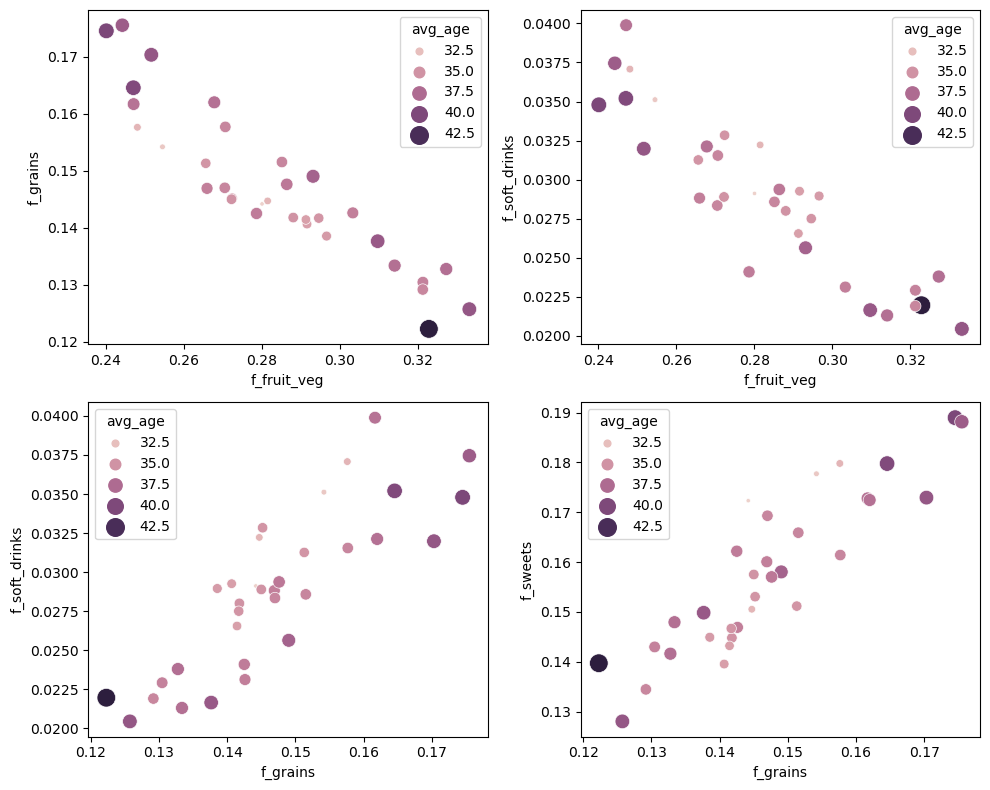

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.scatterplot(x = borough['year']['f_fruit_veg'], y = borough['year']['f_grains'], 
                hue = borough['year']['avg_age'], size = borough['year']['avg_age'],
                sizes=(10,180), ax=axs[0,0])

sns.scatterplot(x = borough['year']['f_fruit_veg'], y = borough['year']['f_soft_drinks'], 
                hue = borough['year']['avg_age'], size = borough['year']['avg_age'],
                sizes=(10,180), ax=axs[0,1])

sns.scatterplot(x = borough['year']['f_grains'], y = borough['year']['f_soft_drinks'], 
                hue = borough['year']['avg_age'], size = borough['year']['avg_age'],
                sizes=(10,180), ax=axs[1,0])

sns.scatterplot(x = borough['year']['f_grains'], y = borough['year']['f_sweets'], 
                hue = borough['year']['avg_age'], size = borough['year']['avg_age'],
                sizes=(10,180), ax=axs[1,1])

# Adjust layout so plots don't overlap
plt.tight_layout()

# Display the plot
plt.show()

In [16]:
# Initialize the KMeans with the number of clusters you desire
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the KMeans algorithm on the two features you're interested in
kmeans.fit(borough['year'][['f_fruit_veg', 'f_grains']])
#kmeans.fit(borough['year'][['f_dairy', 'f_beer']])

# Create a new column in your dataframe to store the cluster information
borough['year']['cluster'] = kmeans.labels_

C:\Users\sarat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sarat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


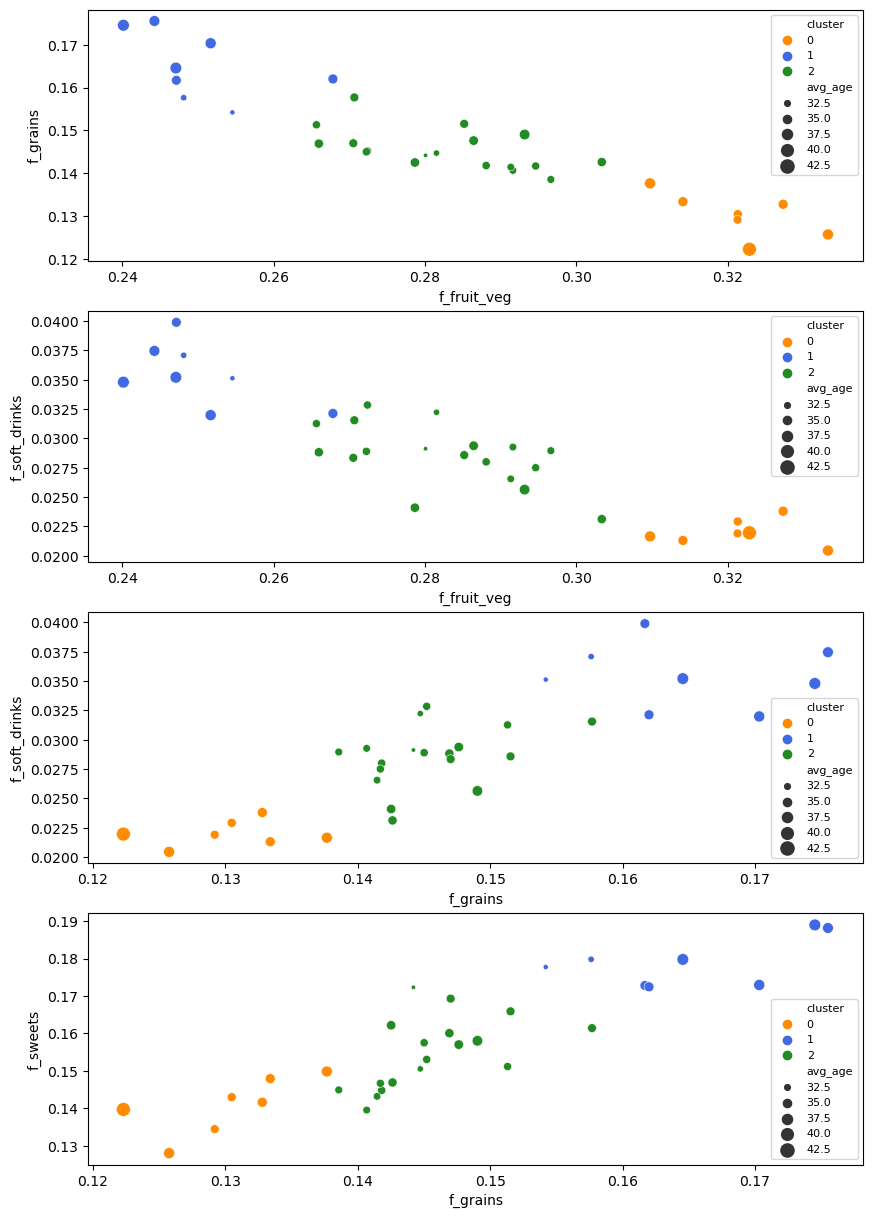

In [17]:
compare = 'avg_age'

# Plotting the scatter plot with the clusters
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

sns.scatterplot(
    x=borough['year']['f_fruit_veg'],
    y=borough['year']['f_grains'],
    hue=borough['year']['cluster'], # Use the new cluster labels for color
    palette=sns.color_palette(['darkorange', 'royalblue', 'forestgreen'], kmeans.n_clusters), # Color palette can be adjusted
    size=borough['year'][compare], # Keep the size mapping as before
    sizes=(10, 100), # Adjust sizes as you like
    ax=axs[0])

sns.scatterplot(
    x=borough['year']['f_fruit_veg'],
    y=borough['year']['f_soft_drinks'],
    hue=borough['year']['cluster'], # Use the new cluster labels for color
    palette=sns.color_palette(['darkorange', 'royalblue', 'forestgreen'], kmeans.n_clusters), # Color palette can be adjusted
    size=borough['year'][compare], # Keep the size mapping as before
    sizes=(10, 100), # Adjust sizes as you like
    ax=axs[1])

sns.scatterplot(
    x=borough['year']['f_grains'],
    y=borough['year']['f_soft_drinks'],
    hue=borough['year']['cluster'], # Use the new cluster labels for color
    palette=sns.color_palette(['darkorange', 'royalblue', 'forestgreen'], kmeans.n_clusters), # Color palette can be adjusted
    size=borough['year'][compare], # Keep the size mapping as before
    sizes=(10, 100), # Adjust sizes as you like
    ax=axs[2])

sns.scatterplot(
    x=borough['year']['f_grains'],
    y=borough['year']['f_sweets'],
    hue=borough['year']['cluster'], # Use the new cluster labels for color
    palette=sns.color_palette(['darkorange', 'royalblue', 'forestgreen'], kmeans.n_clusters), # Color palette can be adjusted
    size=borough['year'][compare], # Keep the size mapping as before
    sizes=(10, 100), # Adjust sizes as you like
    ax=axs[3])

leg = axs[0].legend(prop={'size': 8}, loc='upper right')
leg = axs[1].legend(prop={'size': 8}, loc='upper right')
leg = axs[2].legend(prop={'size': 8}, loc='lower right')
leg = axs[3].legend(prop={'size': 8}, loc='lower right')

plt.show()

In [18]:
borough['year'][['avg_age', 'cluster', 'people_per_sq_km', 'area_sq_km']].groupby(['cluster']).mean()

,avg_age,people_per_sq_km,area_sq_km
cluster,,,
0,38.214375,8068.484110,31.277143
1,37.032377,4607.342896,70.386250
2,35.144692,8173.179225,43.913889


In [19]:
# List all areas in each group
for i in range(3):
    print(f"These are areas in group {i}: \n",list(borough['year'].loc[borough['year']['cluster'] == i]['area_name']), "\n")

These are areas in group 0: 
 ['City of London', 'Barnet', 'Camden', 'Hammersmith and Fulham', 'Kensington and Chelsea', 'Richmond upon Thames', 'Westminster'] 

These are areas in group 1: 
 ['Barking and Dagenham', 'Bexley', 'Bromley', 'Croydon', 'Havering', 'Kingston upon Thames', 'Newham', 'Sutton'] 

These are areas in group 2: 
 ['Brent', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Haringey', 'Harrow', 'Hillingdon', 'Hounslow', 'Islington', 'Lambeth', 'Lewisham', 'Merton', 'Redbridge', 'Southwark', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth'] 



### Insight 2: Seasonal drinking behaviour

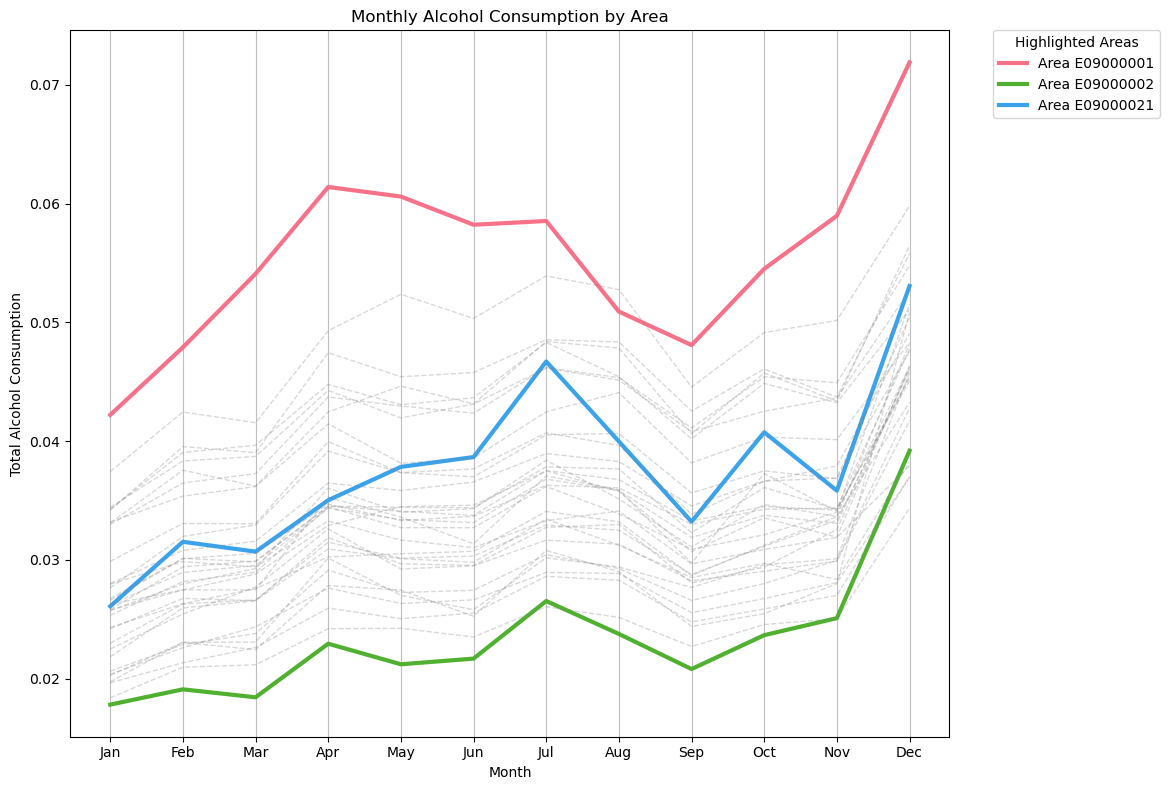

The value of area 1:  [  43.91012412    2.9        2305.86206897]
The value of area 2:  [  33.01732143   36.09       5627.62538099]
The value of area 21:  [  37.07246123   37.26       4605.71658615]


In [20]:
# Alcohol
test = ['f_beer', 'f_wine', 'f_spirits']

# Set a larger figure size for better visibility
plt.figure(figsize=(14, 8))

# Select a subset or all areas to highlight. For example, let's say we want to highlight 5 specific areas:
highlight_areas = ['E09000001', 'E09000002', 'E09000021']  # This is just an example; you need to define this based on your data.

# Define a color palette with enough colors
palette = sns.color_palette("husl", len(highlight_areas))

# Plot lines for highlighted areas with labels
for j, color in zip(highlight_areas, palette):
    temp = []
    for i in month:
        temp.append(borough[i][test].loc[borough[i]['area_id'] == j].sum(axis=1).values[0])
    sns.lineplot(x=month, y=temp, label=f'Area {j}', color=color, linewidth=3)

# Plot lines for all other areas without labels and with a lower opacity
for j in area:
    if j not in highlight_areas:
        temp = []
        for i in month:
            temp.append(borough[i][test].loc[borough[i]['area_id'] == j].sum(axis=1).values[0])
        sns.lineplot(x=month, y=temp, color='grey', alpha=0.3, linewidth=1, linestyle='--', label='_nolegend_')

# Adjust the legend to avoid clutter
plt.legend(title='Highlighted Areas', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(axis='x', linestyle='-', alpha=0.8)

# Set axis labels and a title for context
plt.xlabel('Month')
plt.ylabel('Total Alcohol Consumption')
plt.title('Monthly Alcohol Consumption by Area')

# Show the plot
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect parameter to fit the plot within the figure bounds
plt.show()

print("The value of area 1: ", borough['year'].loc[(borough['year']['area_id'] == 'E09000001')][['avg_age', 'area_sq_km', 'people_per_sq_km']].values[0])
print("The value of area 2: ", borough['year'].loc[(borough['year']['area_id'] == 'E09000002')][['avg_age', 'area_sq_km','people_per_sq_km']].values[0])
print("The value of area 21: ", borough['year'].loc[(borough['year']['area_id'] == 'E09000021')][['avg_age', 'area_sq_km','people_per_sq_km']].values[0])

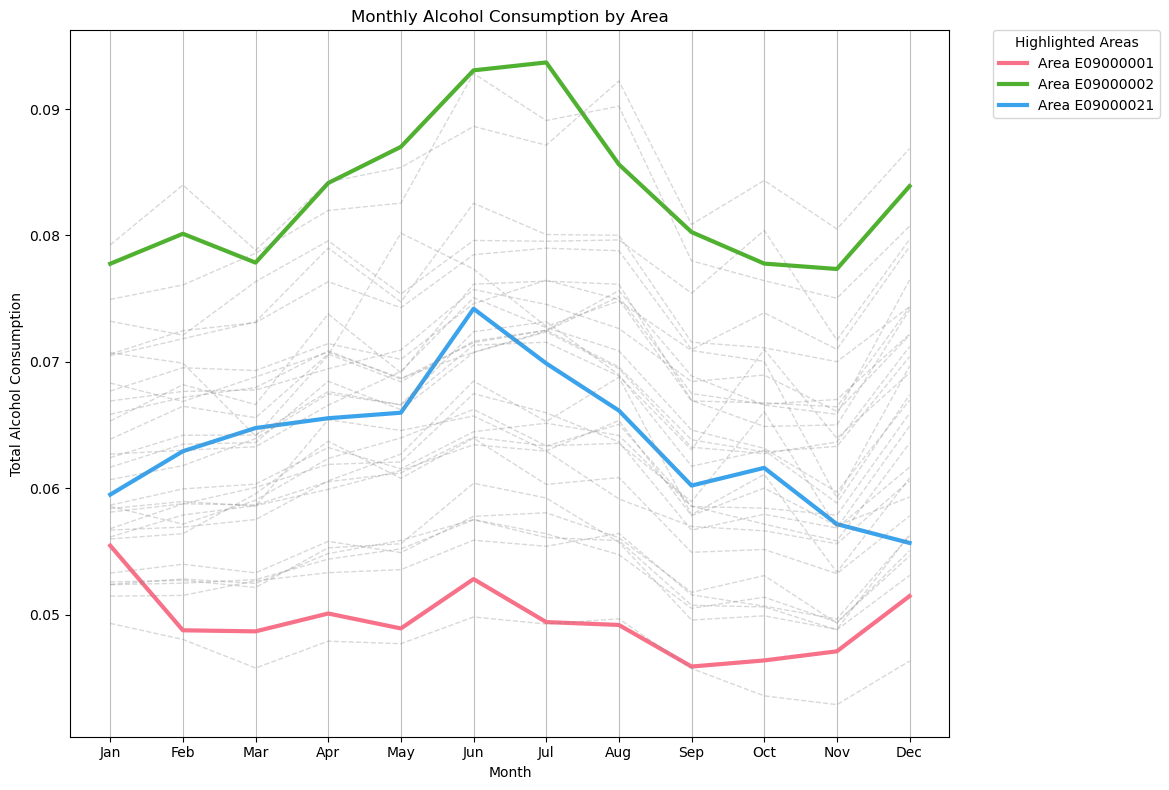

The value of area 1:  43.9101241205279
The value of area 2:  33.01732143080059
The value of area 21:  37.07246123485866


In [21]:
# Alcohol
test = ['f_soft_drinks', 'f_water', 'f_tea_coffee']

# Set a larger figure size for better visibility
plt.figure(figsize=(14, 8))

# Select a subset or all areas to highlight. For example, let's say we want to highlight 5 specific areas:
highlight_areas = ['E09000001', 'E09000002', 'E09000021']  # This is just an example; you need to define this based on your data.

# Define a color palette with enough colors
palette = sns.color_palette("husl", len(highlight_areas))

# Plot lines for highlighted areas with labels
for j, color in zip(highlight_areas, palette):
    temp = []
    for i in month:
        temp.append(borough[i][test].loc[borough[i]['area_id'] == j].sum(axis=1).values[0])
    sns.lineplot(x=month, y=temp, label=f'Area {j}', color=color, linewidth=3)

# Plot lines for all other areas without labels and with a lower opacity
for j in area:
    if j not in highlight_areas:
        temp = []
        for i in month:
            temp.append(borough[i][test].loc[borough[i]['area_id'] == j].sum(axis=1).values[0])
        sns.lineplot(x=month, y=temp, color='grey', alpha=0.3, linewidth=1, linestyle='--', label='_nolegend_')

# Adjust the legend to avoid clutter
plt.legend(title='Highlighted Areas', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(axis='x', linestyle='-', alpha=0.8)

# Set axis labels and a title for context
plt.xlabel('Month')
plt.ylabel('Total Alcohol Consumption')
plt.title('Monthly Alcohol Consumption by Area')

# Show the plot
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect parameter to fit the plot within the figure bounds
plt.show()

print("The value of area 1: ", borough['year'].loc[(borough['year']['area_id'] == 'E09000001')]['avg_age'].values[0])
print("The value of area 2: ", borough['year'].loc[(borough['year']['area_id'] == 'E09000002')]['avg_age'].values[0])
print("The value of area 21: ", borough['year'].loc[(borough['year']['area_id'] == 'E09000021')]['avg_age'].values[0])

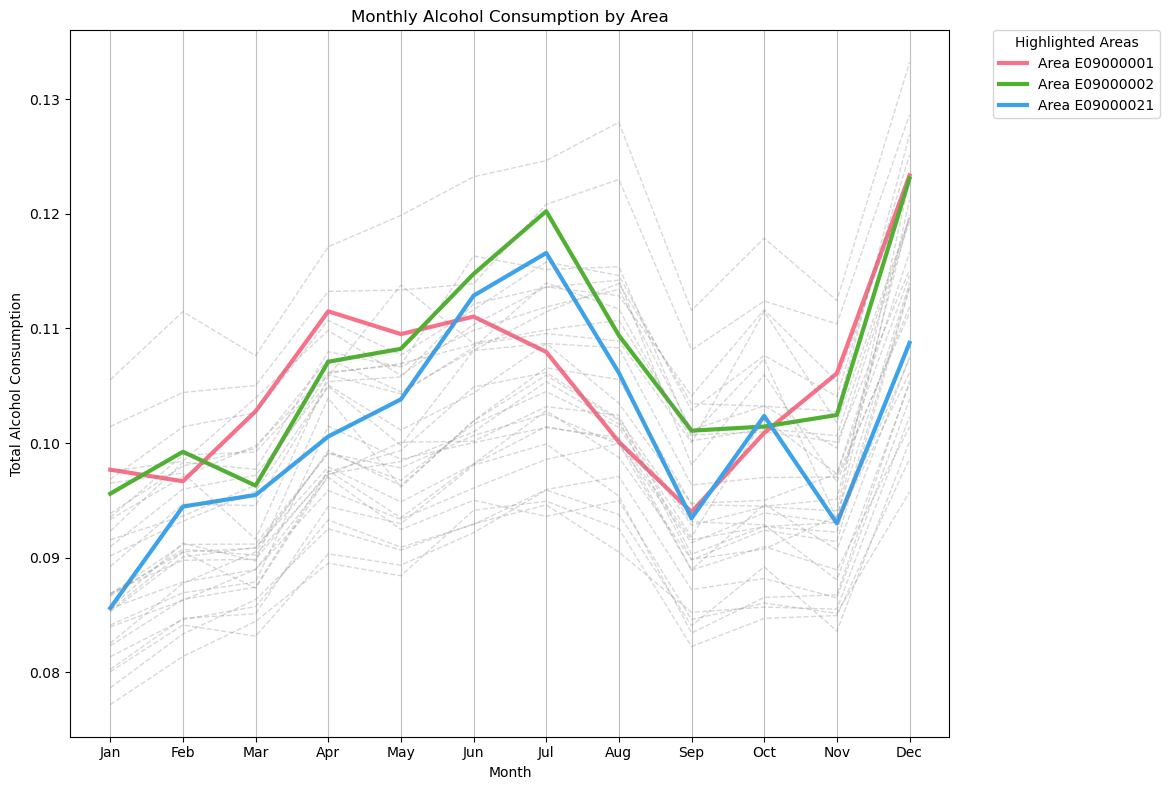

In [22]:
# Alcohol
test = ['f_beer', 'f_wine', 'f_spirits','f_soft_drinks', 'f_water', 'f_tea_coffee']

# Set a larger figure size for better visibility
plt.figure(figsize=(14, 8))

# Select a subset or all areas to highlight. For example, let's say we want to highlight 5 specific areas:
highlight_areas = ['E09000001', 'E09000002', 'E09000021']  # This is just an example; you need to define this based on your data.

# Define a color palette with enough colors
palette = sns.color_palette("husl", len(highlight_areas))

# Plot lines for highlighted areas with labels
for j, color in zip(highlight_areas, palette):
    temp = []
    for i in month:
        temp.append(borough[i][test].loc[borough[i]['area_id'] == j].sum(axis=1).values[0])
    sns.lineplot(x=month, y=temp, label=f'Area {j}', color=color, linewidth=3)

# Plot lines for all other areas without labels and with a lower opacity
for j in area:
    if j not in highlight_areas:
        temp = []
        for i in month:
            temp.append(borough[i][test].loc[borough[i]['area_id'] == j].sum(axis=1).values[0])
        sns.lineplot(x=month, y=temp, color='grey', alpha=0.3, linewidth=1, linestyle='--', label='_nolegend_')

# Adjust the legend to avoid clutter
plt.legend(title='Highlighted Areas', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(axis='x', linestyle='-', alpha=0.8)

# Set axis labels and a title for context
plt.xlabel('Month')
plt.ylabel('Total Alcohol Consumption')
plt.title('Monthly Alcohol Consumption by Area')

# Show the plot
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect parameter to fit the plot within the figure bounds
plt.show()

## 3. Combine the income dataset

In [23]:
income = pd.read_csv('income_bo.csv')
income.head()

,Code,Area,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,E09000001,City of London,"48,922","52,203","62,819","56,450","64,272","66,628","74,004","85,886",...,"83,403","82,808","77,754","79,489","80,655","90,028","88,145","87,817","93,938","97,149"
1,E09000002,Barking and Dagenham,"23,620","24,696","26,050","26,653","27,792","29,088","28,728","28,660",...,"37,214","36,323","36,705","37,959","32,093","32,671","32,086","35,435","35,632","32,800"
2,E09000003,Barnet,"23,128","25,755","26,068","30,210","30,518","30,795","31,652","30,923",...,"33,766","34,936","34,730","35,315","36,818","36,776","37,319","38,132","38,136","39,730"
3,E09000004,Bexley,"21,386","22,580","23,559","23,517","24,723","24,617","28,162","28,847",...,"32,463","31,878","33,367","32,666","33,857","34,496","33,993","36,350","34,710","39,539"
4,E09000005,Brent,"20,911","23,726","24,164","24,071","29,790","25,416","27,371","29,712",...,"34,480","33,484","34,281","36,579","35,840","35,830","36,809","38,287","36,643","43,241"


In [24]:
income.replace('#', pd.NA, inplace=True)

for column in income.columns[2:]:  
    income[column] = pd.to_numeric(income[column].str.replace(',', ''), errors='coerce')

income.iloc[:, 2:] = income.iloc[:, 2:].interpolate(method='linear', axis=1, limit_direction='both')

income.iloc[:, 2:] = income.iloc[:, 2:].astype('float64')

income.head()

,Code,Area,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,E09000001,City of London,48922.0,52203.0,62819.0,56450.0,64272.0,66628.0,74004.0,85886.0,...,83403.0,82808.0,77754.0,79489.0,80655.0,90028.0,88145.0,87817.0,93938.0,97149.0
1,E09000002,Barking and Dagenham,23620.0,24696.0,26050.0,26653.0,27792.0,29088.0,28728.0,28660.0,...,37214.0,36323.0,36705.0,37959.0,32093.0,32671.0,32086.0,35435.0,35632.0,32800.0
2,E09000003,Barnet,23128.0,25755.0,26068.0,30210.0,30518.0,30795.0,31652.0,30923.0,...,33766.0,34936.0,34730.0,35315.0,36818.0,36776.0,37319.0,38132.0,38136.0,39730.0
3,E09000004,Bexley,21386.0,22580.0,23559.0,23517.0,24723.0,24617.0,28162.0,28847.0,...,32463.0,31878.0,33367.0,32666.0,33857.0,34496.0,33993.0,36350.0,34710.0,39539.0
4,E09000005,Brent,20911.0,23726.0,24164.0,24071.0,29790.0,25416.0,27371.0,29712.0,...,34480.0,33484.0,34281.0,36579.0,35840.0,35830.0,36809.0,38287.0,36643.0,43241.0


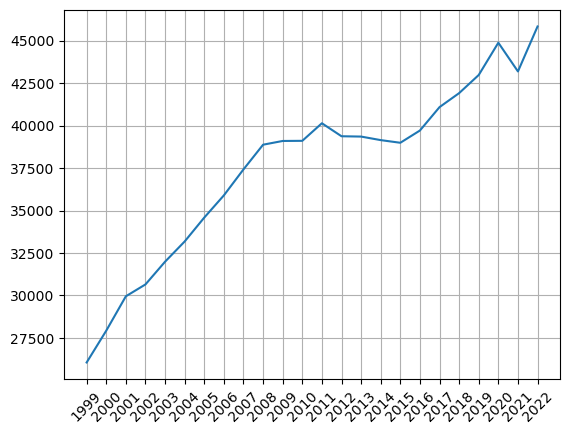

In [36]:
# PLotting the average income of all areas
sns.lineplot(x=income.columns[2:], y=income.iloc[:, 2:].mean(axis=0))
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [39]:
income['avg_salary'] = income[['2013', '2014', '2015', '2016', '2017']].mean(axis=1)

salary_clus = []
for i in range(33):
    cri = income['avg_salary'].loc[income.index == i].values[0]
    if cri > 25000 and cri <= 35000:
        salary_clus.append('25k-35k')
    elif cri > 35000 and cri <= 50000:
        salary_clus.append('35k-50k')
    elif cri > 50000:
        salary_clus.append('50k+')
    else:
        pass

income['Salary_cluster'] = salary_clus
borough['year']['Salary_cluster'] = salary_clus
borough['year']['Salary'] = income['avg_salary']

# Showing the average salary
print(income[['avg_salary', 'Salary_cluster']].groupby(['Salary_cluster']).mean())

# Showing the proportion of each food category
f_energy_cat_clus = f_energy_cat + ['Salary_cluster']
borough['year'][f_energy_cat_clus].groupby(['Salary_cluster']).mean()

                  avg_salary
Salary_cluster              
25k-35k         33293.160000
35k-50k         39251.971429
50k+            64940.100000


,f_beer,f_dairy,f_eggs,f_fats_oils,f_fish,f_fruit_veg,f_grains,f_meat_red,f_poultry,f_readymade,f_sauces,f_soft_drinks,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine
Salary_cluster,,,,,,,,,,,,,,,,,
25k-35k,0.014035,0.103466,0.011134,0.028648,0.020108,0.269303,0.154738,0.048857,0.020307,0.064825,0.014600,0.030626,0.003357,0.164099,0.005963,0.030610,0.015323
35k-50k,0.014352,0.107555,0.012216,0.030477,0.023112,0.291837,0.142278,0.049323,0.020318,0.056123,0.014565,0.027930,0.003244,0.152513,0.005876,0.030445,0.017835
50k+,0.017404,0.114028,0.012972,0.028012,0.023404,0.303418,0.134605,0.046521,0.019447,0.053639,0.013696,0.025335,0.002955,0.151214,0.005425,0.028330,0.019593


### 3.1 Correlation between income and consumption of fruits and vegetables

<Axes: xlabel='Salary', ylabel='f_fruit_veg'>

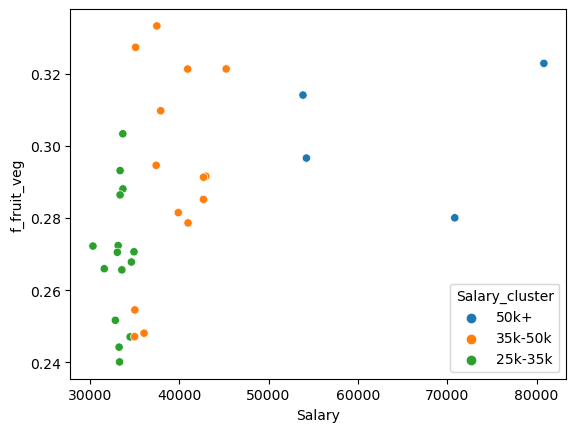

In [40]:
sns.scatterplot(x=borough['year']['Salary'], y=borough['year']['f_fruit_veg'], hue=borough['year']['Salary_cluster'])

In [42]:
correlation, p_value = pearsonr(borough['year']['Salary'], borough['year']['f_fruit_veg'])
print(correlation, p_value)

0.41837470624275425 0.01539183137608849


### 3.2 Correlation between income and red and processed meat

<Axes: xlabel='Salary', ylabel='f_meat_red'>

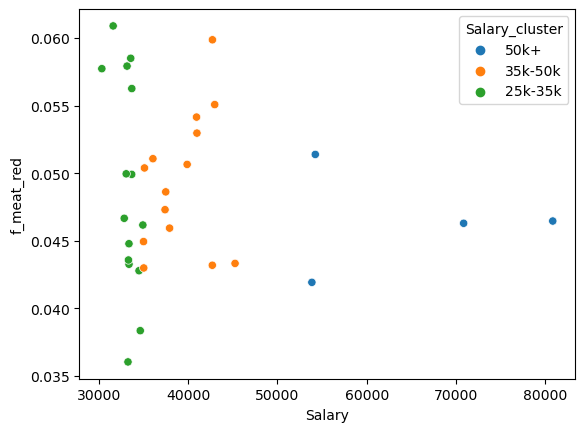

In [41]:
sns.scatterplot(x=borough['year']['Salary'], y=borough['year']['f_meat_red'], hue=borough['year']['Salary_cluster'])

In [43]:
correlation, p_value = pearsonr(borough['year']['Salary'], borough['year']['f_meat_red'])
print(correlation, p_value)

-0.11281930510220849 0.5318996377787185
